In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

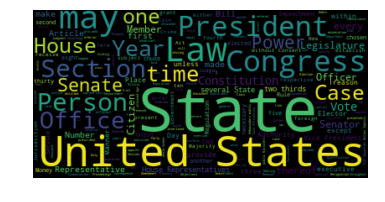

In [3]:
#打开文本
text=open('J:/文档e盘/深度学习/03 词云/03 词云/constitution.txt').read()
#生成对象
wc=WordCloud().generate(text)

#显示词云
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

#保存文件
wc.to_file('wordcloud.png')

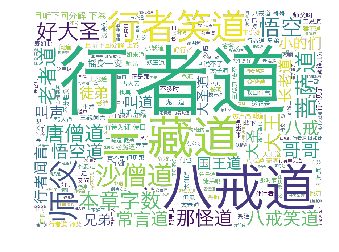

In [10]:
#上面是英文的例子，下面看一下关于中文的情况
text=open('J:/文档e盘/深度学习/03 词云/03 词云/xyj.txt',encoding='UTF-8').read()
wc=WordCloud(font_path='Hiragino.ttf',width=800,height=600,mode='RGBA',background_color=None).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

　 　 [ 西游记 


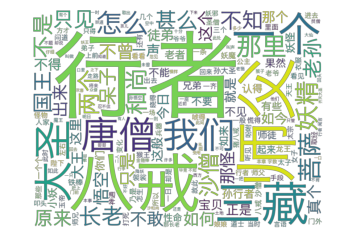

In [13]:
#上面的没有经过分词，看起来没有规律
import jieba
text=open('J:/文档e盘/深度学习/03 词云/03 词云/xyj.txt',encoding='UTF-8').read()

#中文分词
text=' '.join(jieba.cut(text))
print(text[:10])
wc=WordCloud(font_path='Hiragino.ttf', width=800, height=600, mode='RGBA', background_color=None).generate(text)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

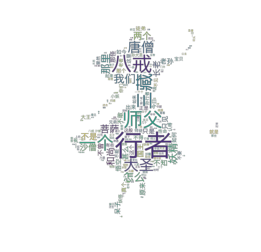

In [19]:
from PIL import Image
import numpy as np

mask=np.array(Image.open('J:\\文档e盘\\深度学习\\03 词云\\03 词云\\black_mask.png'))
wc=wc = WordCloud(mask=mask, font_path='Hiragino.ttf',width=800, height=1000,mode='RGBA', background_color=None).generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
wc.to_file('WordCloud.png')

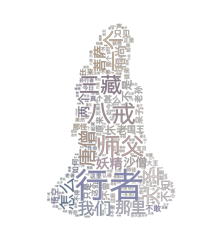

In [20]:
#词云的字体颜色按照图片的颜色来生成
from wordcloud import ImageColorGenerator
mask=np.array(Image.open('J:\\文档e盘\\深度学习\\03 词云\\03 词云\\color_mask.png'))
wc=WordCloud(mask=mask, font_path='Hiragino.ttf', mode='RGBA', background_color=None).generate(text)

#生成图片中的颜色
image_colors=ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)

plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

wc.to_file('WordCloud.png')

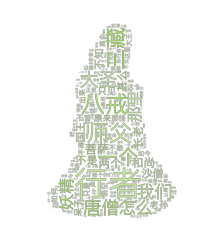

In [22]:
#按照颜色函数生成字体的颜色
import random
#颜色函数
def random_color(word,font_size,position,orientation,font_path, random_state):
    s='hsl(89,%d%%,%d%%)' %(random.randint(60,80),random.randint(60,80))
    #print(s)
    return s
mask=np.array(Image.open('J:\\文档e盘\\深度学习\\03 词云\\03 词云\\color_mask.png'))

wc = WordCloud(color_func=random_color, mask=mask, font_path='Hiragino.ttf', mode='RGBA', background_color=None).generate(text)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file('wordcloud.png')

[('行者', 0.13267341927209544), ('八戒', 0.060546395279482794), ('师父', 0.05548843627643268), ('三藏', 0.048811486167008554), ('大圣', 0.03393315095807803), ('唐僧', 0.030492017542300978), ('沙僧', 0.02823962220676245), ('菩萨', 0.027923454463281632), ('妖精', 0.025040731343187208), ('和尚', 0.022241694784788886), ('那怪', 0.020501984570305918), ('甚么', 0.020410524385245366), ('那里', 0.019449583572240244), ('长老', 0.01893667785007551), ('呆子', 0.01772063096051131), ('怎么', 0.01680863539511296), ('徒弟', 0.01659001462734297), ('不知', 0.016569092446185065), ('老孙', 0.01598471705865597), ('悟空', 0.01594339861261426)]


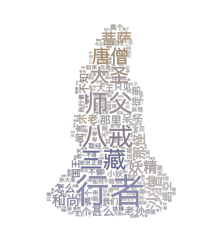

In [25]:
import jieba.analyse
text=open('J:/文档e盘/深度学习/03 词云/03 词云/xyj.txt',encoding='UTF-8').read()

#提取关键词和权重
freq=jieba.analyse.extract_tags(text,topK=200,withWeight=True)
print(freq[:20])
freq={i[0]:i[1] for i in freq}

#生成对象
mask = np.array(Image.open("J:\\文档e盘\\深度学习\\03 词云\\03 词云\\color_mask.png"))
wc = WordCloud(mask=mask, font_path='Hiragino.ttf', mode='RGBA', 
               background_color=None).generate_from_frequencies(freq)

# 从图片中生成颜色
image_colors = ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)

# 显示词云
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# 保存到文件
wc.to_file('wordcloud.png')